### Import Required Libraries
Import the necessary libraries, including NumPy, pandas, matplotlib, and keras.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

### Set Random Seed
Set the random seed for reproducibility using NumPy's random.seed function.

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

### Generate Dummy Data
Generate dummy data for the independent and dependent variables.

In [3]:
# Generate dummy data
n = 29  # Number of datapoints
x = np.linspace(2, 20, n)  # Independent variable
y = 0.2 * x**2 + np.random.normal(0, 2, n)  # Dependent variable with Gaussian noise

### Create a DataFrame
Create a DataFrame using pandas and rename the columns with correct units.

In [4]:
# Create a DataFrame
# Here we are creating a DataFrame using pandas. The DataFrame is a two-dimensional labeled data structure with columns of potentially different types.
# We are passing a dictionary to create the DataFrame where keys become column names and the values associated with keys become column values.
# We are also renaming the columns with correct units.

data = pd.DataFrame({'Depth (m)': x, 'Pressure (MPa)': y})

# Let's print the first few rows of the DataFrame to see if it's created correctly.
data.head()

,Depth (m),Pressure (MPa)
0,2.000000,1.793428
1,2.642857,1.120410
2,3.285714,3.454561
3,3.928571,6.132794
4,4.571429,3.711285


### Plot the Data
Plot the data using matplotlib's scatter function.

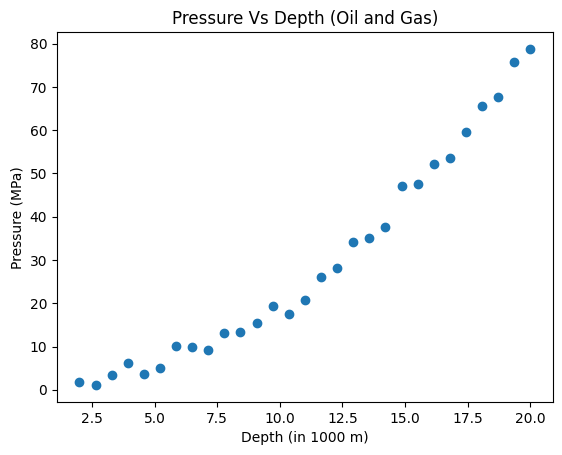

In [5]:
# Plot the data
# We are using matplotlib's scatter function to create a scatter plot of Depth vs Pressure.
# The scatter function takes x and y values as inputs and creates a scatter plot.
# We are also setting the labels for x and y axes and the title of the plot using xlabel, ylabel and title functions respectively.

plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')

# The show function displays the plot. If you are using a Jupyter notebook, then you would need this line to actually display the plot.
plt.show()

### Define the Model
Define the model using keras's Sequential model and add layers to it.

In [6]:
# Define the model
# We are using keras's Sequential model which is a linear stack of layers.
# We are adding two layers to the model using the add function.
# The first layer is a Dense layer with 16 neurons and 'relu' activation function.
# The second layer is a Dense layer with 1 neuron and 'linear' activation function.
# The Dense layer is the regular deeply connected neural network layer. It implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer.

model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

### Compile the Model
Compile the model using the Adam optimizer and mean squared error as the loss function.

In [7]:
# Define the optimizer
# We are using the Adam optimizer which is an extension to stochastic gradient descent.
# Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.
# We are setting the learning rate to 0.1. The learning rate controls how quickly the model is adapted to the problem.

optimizer = Adam(learning_rate=0.1)

# Compile the model
# We are using the compile function to compile the model.
# The compile function configures the model for training.
# We are using mean squared error as the loss function and Adam optimizer.
# We are also setting the metrics that we want to calculate during training and evaluation.
# Here we are calculating mean squared error and mean absolute error.

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error', 'mean_absolute_error'])

### Fit the Model
Fit the model to the data for a specified number of epochs.

In [8]:
# Fit the model
# We are using the fit function to train the model for a fixed number of epochs (iterations on a dataset).
# The fit function trains the model for a fixed number of epochs (iterations on a dataset) and returns a History object.
# Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).
# We are passing the Depth as input and Pressure as output to the fit function.
# We are also setting the number of epochs to 209 and setting verbose to 1 which will print the output after every epoch.

model.fit(data['Depth (m)'], data['Pressure (MPa)'], epochs=209, verbose=1)

Epoch 1/209
1/1 [==============================] - 1s 583ms/step - loss: 2243.1997 - mean_squared_error: 2243.1997 - mean_absolute_error: 38.2819
Epoch 2/209
1/1 [==============================] - 0s 10ms/step - loss: 1623.6896 - mean_squared_error: 1623.6896 - mean_absolute_error: 31.6648
Epoch 3/209
1/1 [==============================] - 0s 0s/step - loss: 1195.3077 - mean_squared_error: 1195.3077 - mean_absolute_error: 26.2765
Epoch 4/209
1/1 [==============================] - 0s 16ms/step - loss: 893.7750 - mean_squared_error: 893.7750 - mean_absolute_error: 21.9032
Epoch 5/209
1/1 [==============================] - 0s 0s/step - loss: 658.3077 - mean_squared_error: 658.3077 - mean_absolute_error: 18.1673
Epoch 6/209
1/1 [==============================] - 0s 0s/step - loss: 470.4778 - mean_squared_error: 470.4778 - mean_absolute_error: 14.7962
Epoch 7/209
1/1 [==============================] - 0s 3ms/step - loss: 318.0503 - mean_squared_error: 318.0503 - mean_absolute_error: 12.2512

### Predict the Pressure Values
Use the trained model to predict the pressure values.

In [9]:
# Predict the pressure values
# We are using the predict function of the model to predict the pressure values based on the depth.
# The predict function generates output predictions for the input samples.
# We are passing the Depth as input to the predict function.

predictions = model.predict(data['Depth (m)'])

# Let's print the first few predicted pressure values to see if the prediction is working correctly.
print(predictions[:5])

1/1 [==============================] - 0s 134ms/step
[[-2.2585533 ]
 [-2.2585533 ]
 [-1.6578696 ]
 [ 0.39607143]
 [ 2.4500139 ]]


### Plot the Regression Curve with the Data
Plot the regression curve with the data using matplotlib's plot function.

1/1 [==============================] - 0s 147ms/step


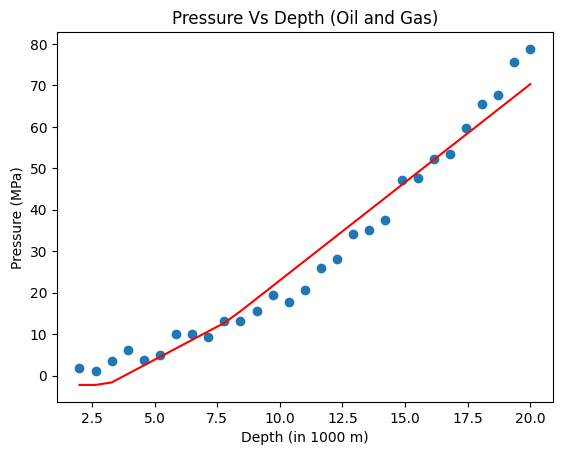

In [10]:
# Predict the pressure values
predictions = model.predict(data['Depth (m)'])

# Plot the regression curve with the data
plt.scatter(data['Depth (m)'], data['Pressure (MPa)'])
plt.plot(data['Depth (m)'], predictions, color='red')
plt.xlabel('Depth (in 1000 m)')
plt.ylabel('Pressure (MPa)')
plt.title('Pressure Vs Depth (Oil and Gas)')
plt.show()